In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Input
from keras.layers import Dense, Dropout, Flatten

In [3]:
train = h5py.File('/content/drive/MyDrive/Hand Gesture Model/train_signs.h5', 'r')
test = h5py.File('/content/drive/MyDrive/Hand Gesture Model/test_signs.h5','r')

In [4]:
train.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [5]:
test.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [6]:
#Creating the train and test files
x_train = np.array(train['train_set_x'])
y_train = np.array(train['train_set_y'])
x_test = np.array(test['test_set_x'])
y_test = np.array(test['test_set_y'])

x_train = x_train/255.
x_test = x_test/255.

print('x train shape is', x_train.shape)
print('y train shape is', y_train.shape)
print('x test shape is', x_test.shape)
print('y test shape is', y_test.shape)

x train shape is (1080, 64, 64, 3)
y train shape is (1080,)
x test shape is (120, 64, 64, 3)
y test shape is (120,)


In [7]:
#converting the y from being vectors to binary
y_train = keras.utils.to_categorical(y_train, num_classes=6)
y_test = keras.utils.to_categorical(y_test, num_classes=6)

print('y train shape is', y_train.shape)
print('y test shape is', y_test.shape)

y train shape is (1080, 6)
y test shape is (120, 6)


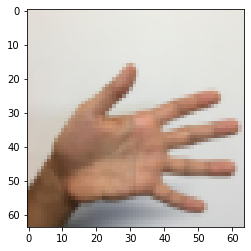

In [8]:
# Data_visualization
plt.imshow(x_train[0])
plt.show()

In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 1.]


In [14]:
def hand_model():

  model= Sequential()
  model.add(Conv2D(filters=8, kernel_size = (4,4), padding='same',strides=1, activation='relu', input_shape=(64,64,3)))
  model.add(MaxPool2D(pool_size=8, strides=8, padding='SAME'))
  model.add(Flatten())
  model.add(Dense(6, activation='softmax'))


  
  return model

conv_model = hand_model()
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 3,470
Trainable params: 3,470
Non-trainable params: 0
_________________________________________________________________


In [15]:
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 1s 21ms/step - loss: 1.8286 - accuracy: 0.1713 - val_loss: 1.7944 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 0s 10ms/step - loss: 1.7916 - accuracy: 0.1944 - val_loss: 1.7700 - val_accuracy: 0.2167
Epoch 3/100
17/17 [==============================] - 0s 10ms/step - loss: 1.7537 - accuracy: 0.2639 - val_loss: 1.7379 - val_accuracy: 0.3167
Epoch 4/100
17/17 [==============================] - 0s 10ms/step - loss: 1.7181 - accuracy: 0.3213 - val_loss: 1.7024 - val_accuracy: 0.4417
Epoch 5/100
17/17 [==============================] - 0s 10ms/step - loss: 1.6700 - accuracy: 0.4259 - val_loss: 1.6576 - val_accuracy: 0.5000
Epoch 6/100
17/17 [==============================] - 0s 10ms/step - loss: 1.6111 - accuracy: 0.5065 - val_loss: 1.6021 - val_accuracy: 0.5333
Epoch 7/100
17/17 [==============================] - 0s 10ms/step - loss: 1.5412 - accuracy: 0.5389 - val_loss: 1.5332 - val_accuracy: 0.5667
Epoch 

In [19]:
conv_model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 10ms/step - loss: 0.3631 - accuracy: 0.8750


[0.3631269633769989, 0.875]

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epoch')]

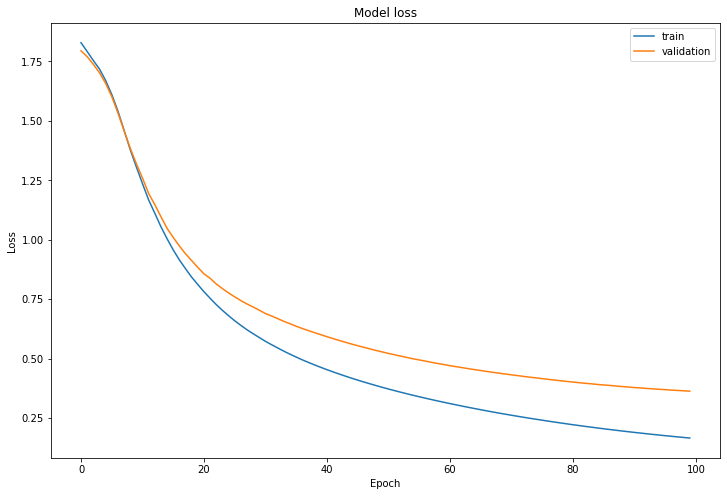

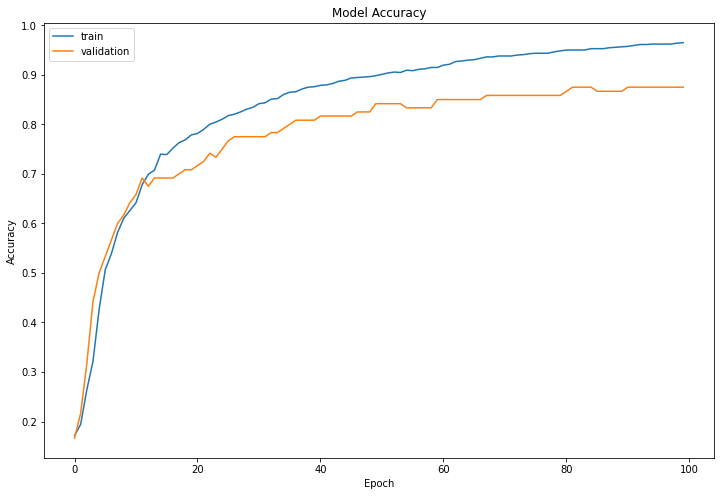

In [17]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')